<a href="https://colab.research.google.com/github/ChitraChaudhari/GC_DataEngineering_Bootcamp/blob/main/EDA/EDA_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('https://storage.googleapis.com/mbcc/titanic.csv')
titanic_df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


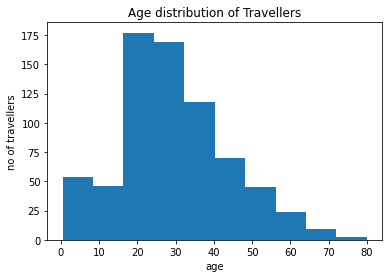

In [2]:
plt.hist(titanic_df.age.dropna()) 
#dropped all the NaN values of age by invoking the dropna() function on the age column values.
#If you do not drop the invalid values, your plot will throw errors as the hist function expects you to give it all numerical values.
plt.title("Age distribution of Travellers")
plt.xlabel('age')
plt.ylabel("no of travellers")
plt.show()

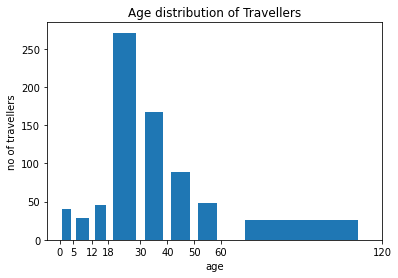

In [3]:
age_groups=[0,5,12,18,30,40,50,60,120]
plt.hist(titanic_df.age.dropna(),bins=age_groups, rwidth=0.7) 
#dropped all the NaN values of age by invoking the dropna() function on the age column values.
#If you do not drop the invalid values, your plot will throw errors as the hist function expects you to give it all numerical values.
plt.title("Age distribution of Travellers")
plt.xlabel('age')
plt.xticks(age_groups)
plt.ylabel("no of travellers")
plt.show()

How many peple were there from each town on titanic?

In [4]:
#By using groupby
count_by_embark= titanic_df.groupby('embark_town').size()
count_by_embark

embark_town
Cherbourg      168
Queenstown      77
Southampton    644
dtype: int64

In [5]:
type(count_by_embark)

pandas.core.series.Series

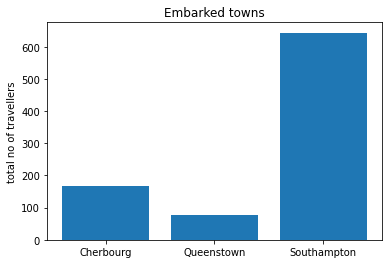

In [6]:
plt.bar(count_by_embark.index,count_by_embark)
plt.title("Embarked towns")
plt.ylabel("total no of travellers")
plt.show()

In [7]:
# By using value_counts()
data = titanic_df['embark_town'].value_counts()
type(data)

pandas.core.series.Series

<BarContainer object of 3 artists>

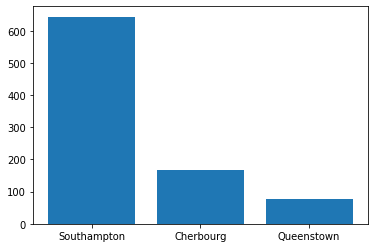

In [8]:
plt.bar(data.index,data)

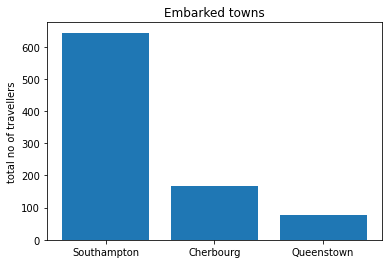

In [9]:
plt.bar(titanic_df['embark_town'].dropna().unique(),titanic_df['embark_town'].value_counts())
plt.title("Embarked towns")
plt.ylabel("total no of travellers")
plt.show()

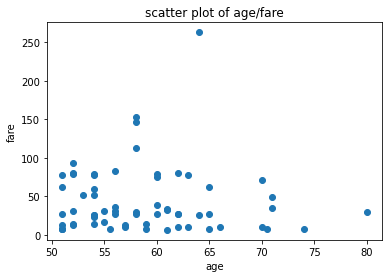

In [10]:
plt.title('scatter plot of age/fare')
plt.ylabel("fare")
plt.xlabel("age")
plt.scatter(titanic_df[titanic_df.age >50].age,titanic_df[titanic_df.age>50].fare)
plt.show()

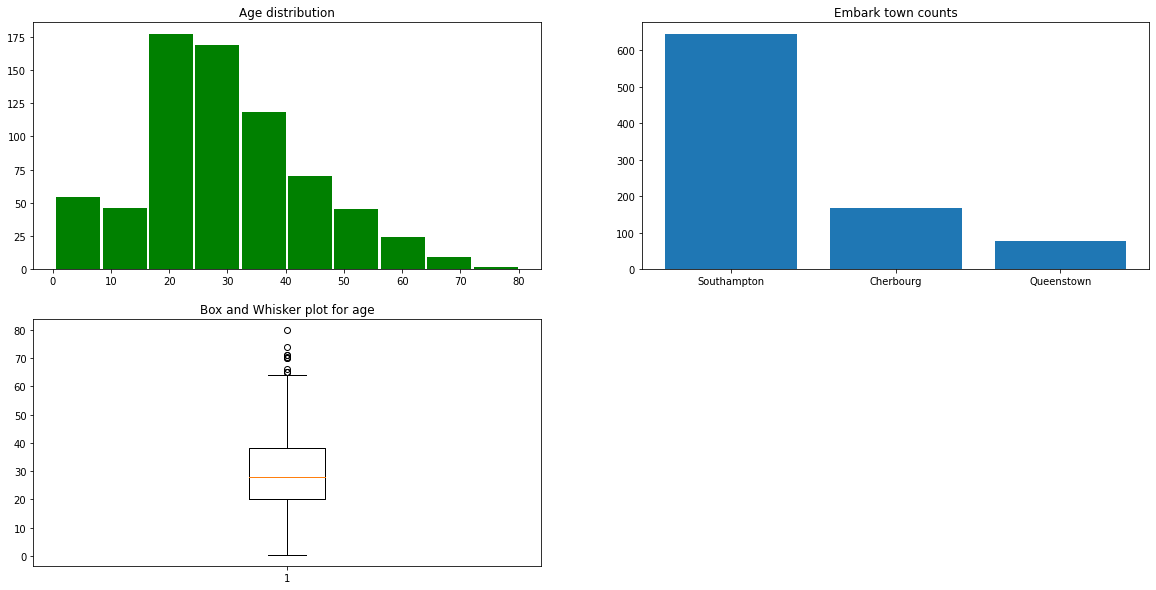

In [11]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)


ax1.hist(titanic_df['age'].dropna(),rwidth=0.95,color='green')
ax1.set_title("Age distribution")

agg1= titanic_df['embark_town'].value_counts();
ax2.bar(agg1.index,agg1.values)
ax2.set_title("Embark town counts")

ax3.boxplot(titanic_df['age'].dropna())
ax3.set_title("Box and Whisker plot for age")

plt.show()

 total number of surived vs dead across each of the embark towns

In [12]:
survived_by_town_group = titanic_df.groupby(['embark_town','survived']).size().unstack()
survived_by_town_group

survived,0,1
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


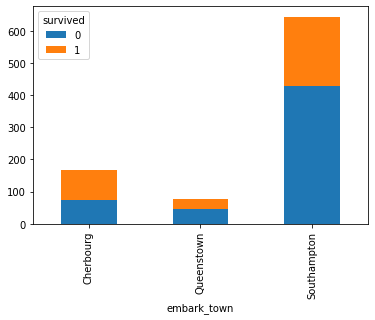

In [13]:
survived_by_town_group.plot(kind='bar',stacked=True)
plt.show()

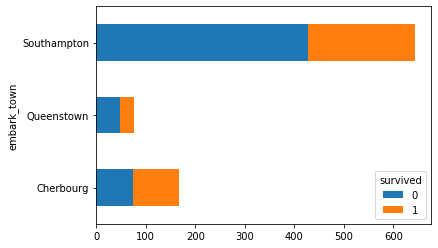

In [14]:
survived_by_town_group.plot(kind='barh',stacked=True)
plt.show()

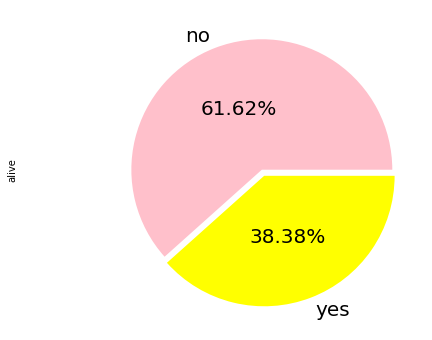

In [15]:
seperate = [0,0.05]

pie = titanic_df['alive'].value_counts().plot.pie(explode = seperate, colors=['pink','yellow'],
                                                  autopct=(lambda p:'{:.2f}%'.format(p)),
                                                  fontsize=20, pctdistance=0.5,
                                                  figsize=(6,6))
pie.yaxis.set_label_coords(-0.25, 0.5)


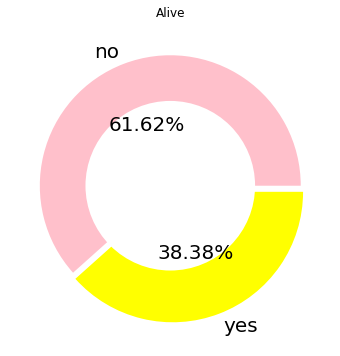

In [16]:
seperate = [0,0.05]

pie = titanic_df['alive'].value_counts().plot.pie(explode = seperate, colors=['pink','yellow'],
                                                  autopct=(lambda p:'{:.2f}%'.format(p)),
                                                  fontsize=20, pctdistance=0.5, label='',
                                                  figsize=(6,6))

center_circle = plt.Circle((0,0),0.65,fc='white')
pie.get_figure().gca().add_artist(center_circle)

plt.title("Alive")
plt.show()

Survivals per age group

In [17]:
age_group = titanic_df.groupby('age')['survived'].sum()
age_group.nlargest()

age
24.0    15
22.0    11
27.0    11
35.0    11
36.0    11
Name: survived, dtype: int64

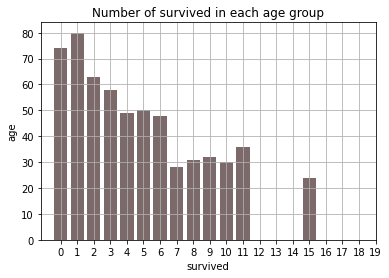

In [18]:
plt.bar(age_group,age_group.index,color='#7c6a6a')
plt.title('Number of survived in each age group')
plt.xlabel('survived')
plt.xticks(range(0,20,1))
plt.ylabel('age')
plt.grid()
plt.show()